In [44]:
import numpy as np

# Create example data
n_samples = 1000
x_temp = np.random.uniform(low=-10.0, high=40.0, size=n_samples)
x_sky = np.random.choice(['sunny', 'cloudy', 'rainy'], size=n_samples)
x_prec_prob = np.random.uniform(low=0.0, high=1.0, size=n_samples)
x_precip = np.random.uniform(low=0.0, high=10.0, size=n_samples)
x_humidity = np.random.uniform(low=0.0, high=100.0, size=n_samples)
x_wind_speed = np.random.uniform(low=0.0, high=20.0, size=n_samples)
y_solar_power = np.random.uniform(low=0.0, high=1000.0, size=n_samples)

# Normalize input variables
x_temp_norm = (x_temp - np.mean(x_temp)) / np.std(x_temp)
x_prec_prob_norm = (x_prec_prob - np.mean(x_prec_prob)) / np.std(x_prec_prob)
x_precip_norm = (x_precip - np.mean(x_precip)) / np.std(x_precip)
x_humidity_norm = (x_humidity - np.mean(x_humidity)) / np.std(x_humidity)
x_wind_speed_norm = (x_wind_speed - np.mean(x_wind_speed)) / np.std(x_wind_speed)


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define model architecture
inputs = layers.Input(shape=(6,))
x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [46]:
import tensorflow as tf
import numpy as np

# Define the PINN model
class PINN(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=50, activation=tf.nn.tanh)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=50, activation=tf.nn.tanh)
        self.output_layer = tf.keras.layers.Dense(units=output_dim)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        output = self.output_layer(x)
        return output

# Define the loss function
def custom_loss(model, inputs, outputs):
    # Calculate the gradients
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs)
        loss = tf.reduce_mean(tf.square(predictions - outputs))

    grads = tape.gradient(loss, model.trainable_variables)

    # Define the boundary conditions
    boundary_x = tf.constant([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
    boundary_y = tf.constant([[0.0], [0.0]])

    # Calculate the boundary conditions
    predictions_boundary = model(boundary_x)
    loss_boundary = tf.reduce_mean(tf.square(predictions_boundary - boundary_y))

    # Return the loss function
    return loss + loss_boundary


In [47]:
# Define the input and output dimensions
input_dim = 6
output_dim = 1

# Create the PINN model
model = PINN(input_dim, output_dim)

# Define the optimizer and the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define the number of epochs
num_epochs = 5000

# Generate example data
x_train = np.random.rand(1000, 6)
y_train = np.sin(np.sum(x_train, axis=1)).reshape(-1, 1)

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
# Train the PINN model
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = custom_loss(model, x_train, y_train)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 500 == 0:
        print(f"Epoch {epoch} Loss {loss.numpy():.4f}")

# Evaluate the PINN model
x_test = np.random.rand(1000, 6)
y_test = np.sin(np.sum(x_test, axis=1)).reshape(-1, 1)

predictions = model(x_test)
mse = tf.reduce_mean(tf.square(predictions - y_test))
print(f"Mean Squared Error: {mse.numpy():.4f}")


Epoch 0 Loss 0.3598
Epoch 500 Loss 0.0110
Epoch 1000 Loss 0.0010
Epoch 1500 Loss 0.0005
Epoch 2000 Loss 0.0003
Epoch 2500 Loss 0.0002
Epoch 3000 Loss 0.0002
Epoch 3500 Loss 0.0001
Epoch 4000 Loss 0.0001
Epoch 4500 Loss 0.0001
Mean Squared Error: 0.0001


In [17]:
# Predict on test set
preds = model.predict(x_test)

# Calculate mean squared error
mse = np.mean((preds - y_test)**2)

print('Mean Squared Error:', mse)


32/32 [==============================] - 0s 612us/step
Mean Squared Error: 0.00010660858214441741


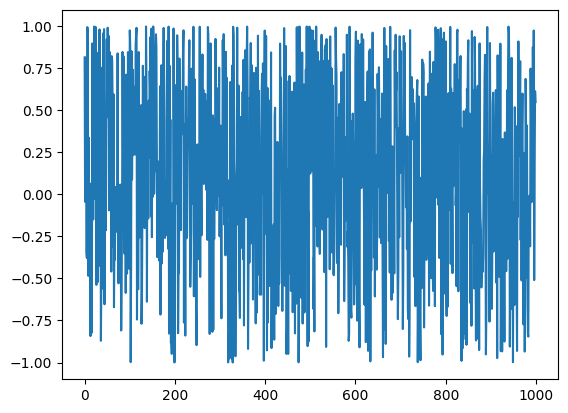

In [20]:
plt.plot(y_test)

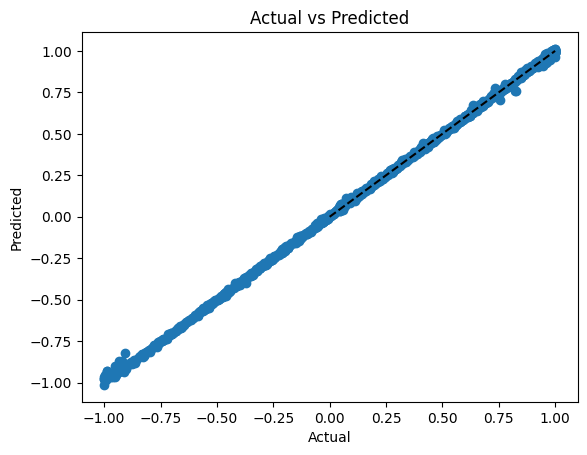

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

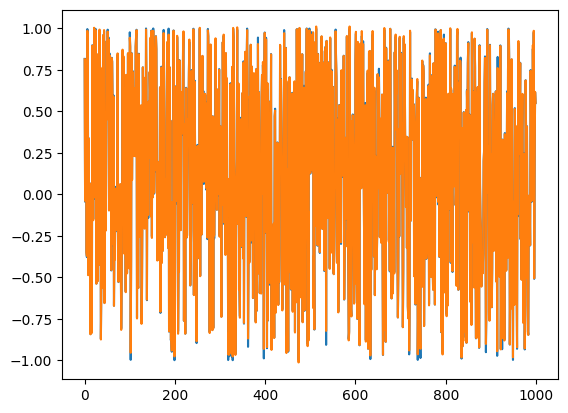

In [21]:
plt.plot(y_test)
plt.plot(preds)

0.9999900347805607

In [ ]:
predicted_value = (max_value_norm + 1) / 2 * (max_value - min_value) + min_value

----

In [4]:
import tensorflow as tf
import numpy as np

def get_data():
    # Generate example data
    np.random.seed(123)
    X = np.random.randn(1000, 6)
    y = np.random.randn(1000, 1)
    return X, y

def physics_loss(pred_y, y, pred_dy_dx, X):
    # Define physics loss
    physics_loss = tf.reduce_mean(tf.square(pred_dy_dx + 0.5 * X[:,0:1] - X[:,1:2] * X[:,5:6] - X[:,3:4] + X[:,4:5] - pred_y))
    return physics_loss

class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense = tf.keras.layers.Dense(64, activation='tanh')
        self.dense_1 = tf.keras.layers.Dense(64, activation='tanh')
        self.dense_2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.dense_1(x)
        return self.dense_2(x)



In [6]:
# Get example data
X, y = get_data()
X = tf.convert_to_tensor(X, dtype=tf.float32)

# Define model and optimizer
model = PINN()
optimizer = tf.keras.optimizers.Adam()

# Training loop
for i in range(1000):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(X)
        pred_y = model(X)
        pred_dy_dx = tape.gradient(pred_y, X)
        loss = physics_loss(pred_y, y, pred_dy_dx, X)

    # Compute gradients and update variables
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Print loss every 100 iterations
    if i % 100 == 0:
        print(f"Loss at step {i}: {loss.numpy()}")


Loss at step 0: 2.9155638217926025
Loss at step 100: 0.9612025618553162
Loss at step 200: 0.547775387763977
Loss at step 300: 0.5095663666725159
Loss at step 400: 0.4947337508201599
Loss at step 500: 0.48518502712249756
Loss at step 600: 0.47686344385147095
Loss at step 700: 0.4692660868167877
Loss at step 800: 0.4616539776325226
Loss at step 900: 0.4536803364753723


----